> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

Dataset Description
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.

‘Neighborhood’ indicates the location of the hospital.

‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

'noshow' indicates whether or not the patient showed up their appointment

Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



## Question

### How does showed up affected by Gender factor?
### (How does showed up affected by( Handcap, Hipertension, Diabetes, Alcoholism, factors?)
### What is the influential of 'SMS_received' on showed up the appointment ?
###  Does Scholarship affects show up rate ?

<a id='intro'></a>
## Introduction

This project is a practical application of statistical operations and visualization on a Dataset, I will analyze the Medical Appointment using numpy,pandas, matplotlib, and seaborn libraries

In [8]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [9]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('no_show.csv')
#   types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# get outlier of age because the min in it is -1
outlier = df.query('Age<0 | Age>100')
outlier

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
df.drop(df[(df.Age<0) | (df.Age>100)].index, inplace=True)


In [15]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [16]:
# change the type of columns because it should be datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [17]:
# deleting unnecessary columns
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace=True )
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
y = enumerate(df.columns)
print(list(y))

[(0, 'Gender'), (1, 'ScheduledDay'), (2, 'AppointmentDay'), (3, 'Age'), (4, 'Neighbourhood'), (5, 'Scholarship'), (6, 'Hipertension'), (7, 'Diabetes'), (8, 'Alcoholism'), (9, 'Handcap'), (10, 'SMS_received'), (11, 'No-show')]


In [19]:
# renameing the colume noshow becouse i get some errors when not rename it
df.rename(columns={'No-show' : 'noshow'}, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noshow
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


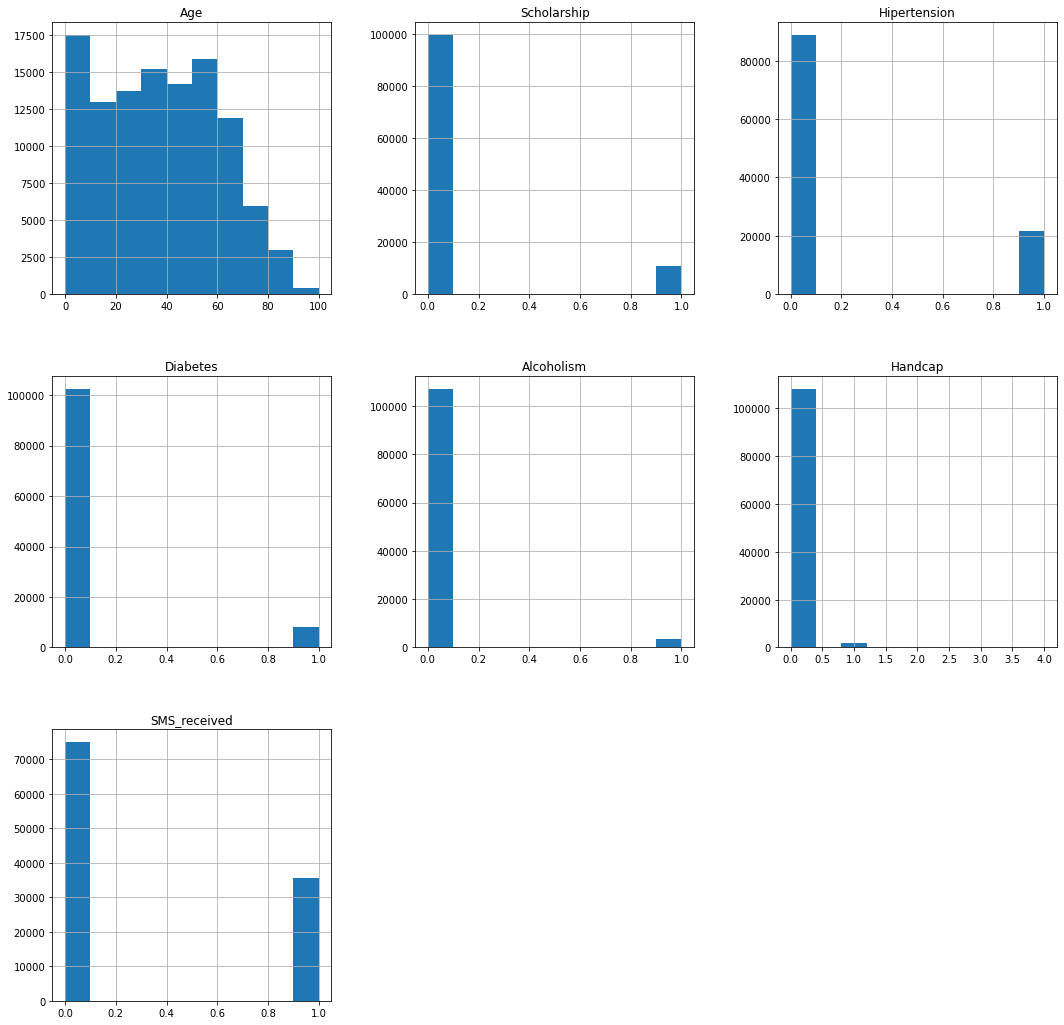

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# drow hist to explore data
df.hist(figsize=(18,18));

<AxesSubplot:xlabel='noshow', ylabel='count'>

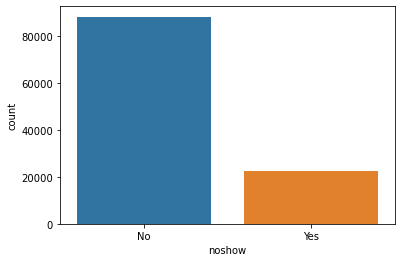

In [21]:
# bar chart for noshow column

sns.countplot(data = df, x = 'noshow')

In [22]:
# total showed up  patients 
s =(df.noshow == 'No').sum()
s

88203

In [23]:
# total non-showed patients 
ns =(df.noshow=='Yes').sum()
ns

22316

In [24]:
df_s = df.noshow == "No"
df_s.head()

0    True
1    True
2    True
3    True
4    True
Name: noshow, dtype: bool

In [25]:
#create show df
s_df = df[df.noshow=='No']
s_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noshow
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [26]:
# create no show df
ns_df = df[df.noshow=='Yes']
ns_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,noshow
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [27]:
s_df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,88203.000000,88203.000000,88203.000000,88203.000000,88203.000000,88203.000000,88203.000000
mean,37.787297,0.093908,0.204392,0.073841,0.030418,0.022732,0.291339
std,23.334275,0.291703,0.403259,0.261513,0.171737,0.162721,0.454382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [28]:
ns_df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,22316.000000,22316.000000,22316.000000,22316.00000,22316.000000,22316.000000,22316.000000
mean,34.306820,0.115522,0.169027,0.06408,0.030337,0.020165,0.438430
std,21.947486,0.319659,0.374784,0.24490,0.171517,0.156268,0.496206
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,98.000000,1.000000,1.000000,1.00000,1.000000,4.000000,1.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

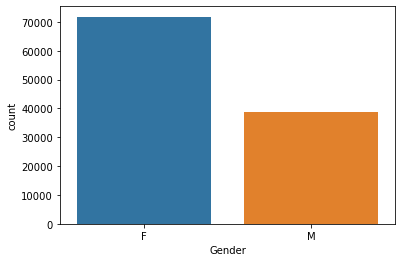

In [29]:
# bar chart for gender
sns.countplot(data = df, x = 'Gender')

the plot show that in this df female is more than male

<AxesSubplot:ylabel='noshow'>

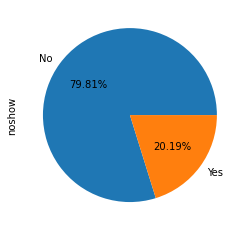

In [30]:
# pie plot for show and no-show percentage
df['noshow'].value_counts().plot(kind='pie', autopct='%.2f%%')

the plot show that the Percentage of no show is 20.19%

In [78]:
def pie_plot(col_name):
    df.groupby([col_name, 'noshow']).count()['Age'].unstack(col_name).plot(kind='pie', title= 'percentage by {} attendance'.format(col_name), autopct='%.2f%%',subplots=True,figsize=(18,18))

In [95]:
def bar_plot(col_name):
    df.groupby([col_name, 'noshow']).count()['Age'].unstack(col_name).plot(kind='bar',rot=0, title= 'percentage by {} attendance'.format(col_name))

### Research Question 1 (How does showed up affected by Gender factor?)

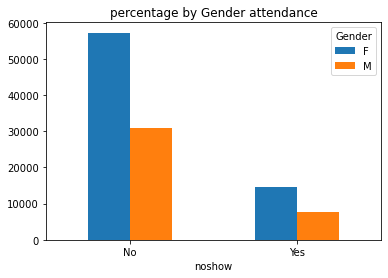

In [110]:
#'Gender' factor
bar_plot('Gender')

the fig show that more female is show than male but the male in the dataset is the half of female

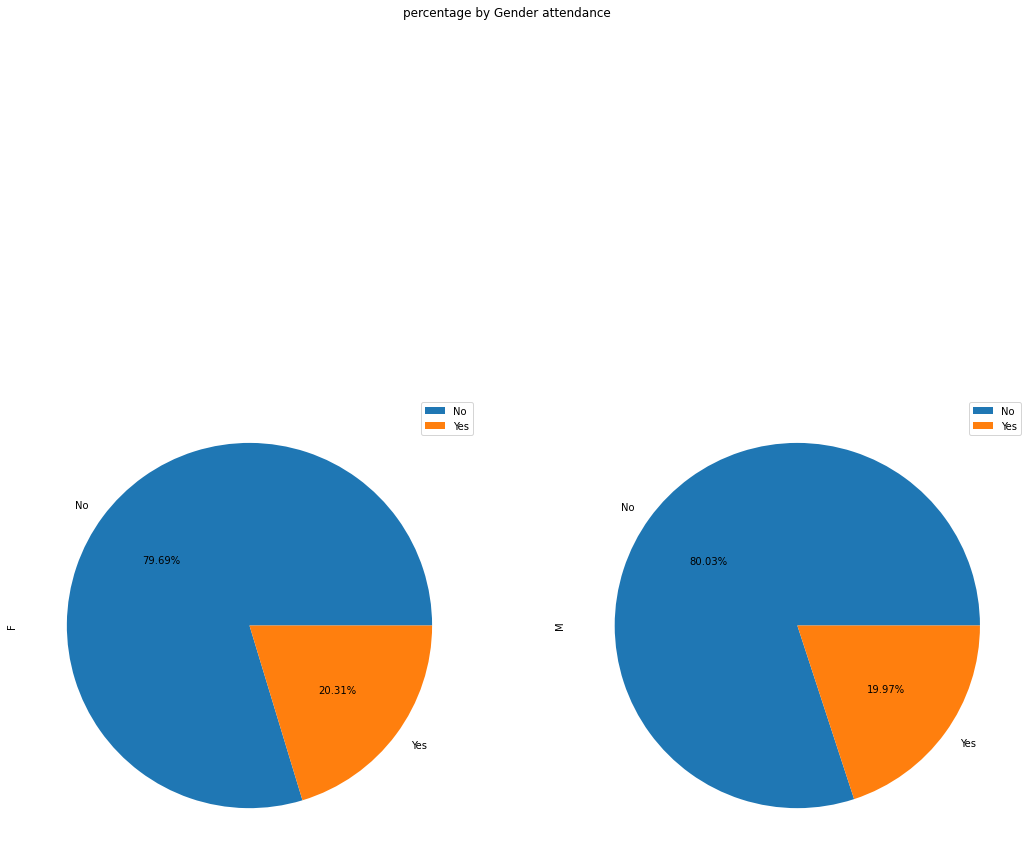

In [111]:
#'Gender' factor

pie_plot('Gender')

this fig is get the persentage of no show and show in male and female it show that the persentage is nearst to each ather

### Research Question 2  (How does showed up affected by( Handcap, Hipertension, Diabetes, Alcoholism, factors?)

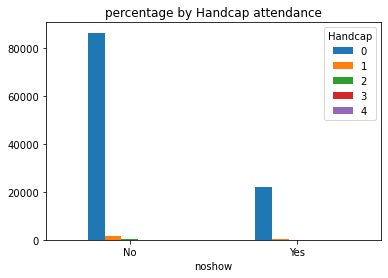

In [112]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# Bar plot for 'Handcap' factor
bar_plot('Handcap')

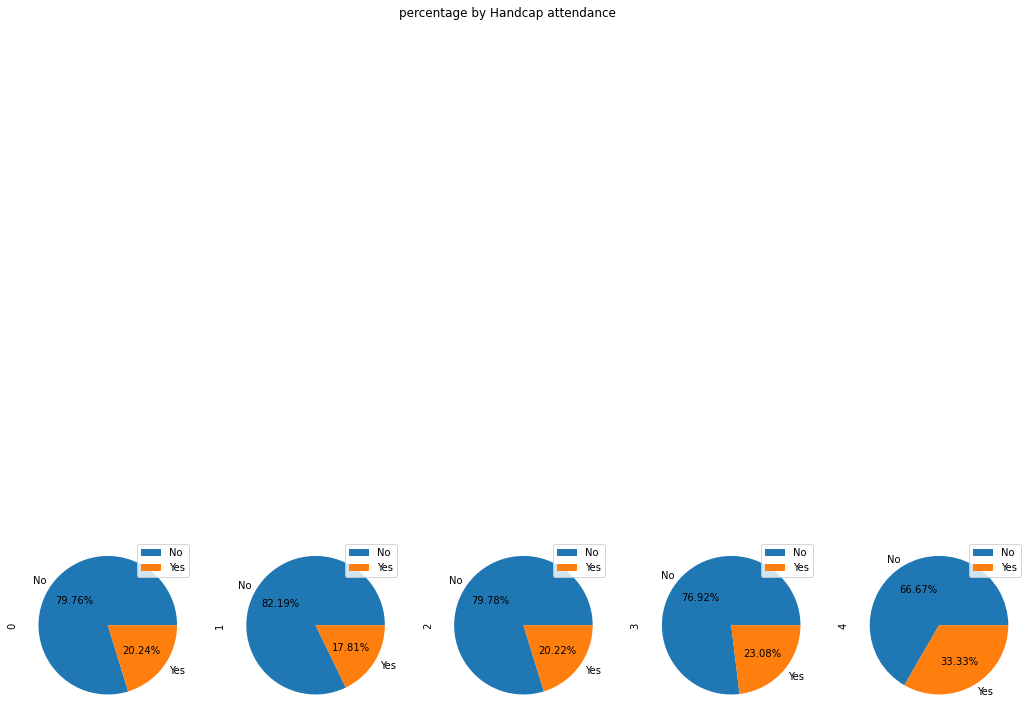

In [113]:
# Pie plot for 'Handcap' factor
pie_plot('Handcap')

this fig show that when the number of handcap increase the persentage of noshow increase

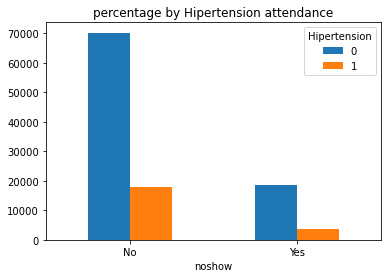

In [114]:
# Bar plot for 'Hypertension' factor
bar_plot('Hipertension')

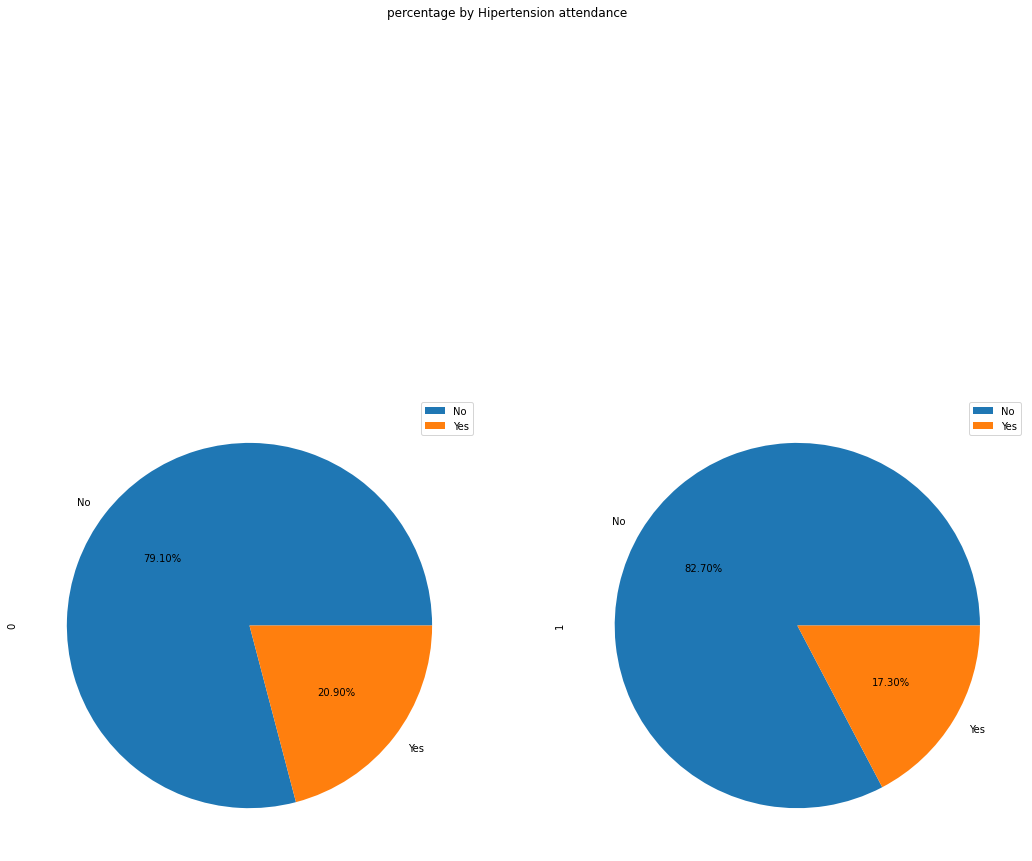

In [115]:
# Pie plot for 'Hypertension' factor
pie_plot('Hipertension')

this fig show that Hipertension make peaple more care a bout them health and show

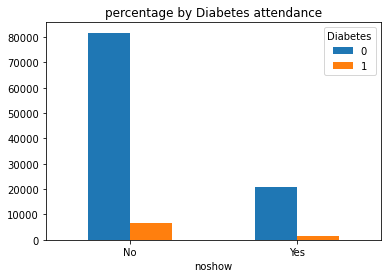

In [116]:
# Bar plot for 'Diabetes' factor
bar_plot('Diabetes')

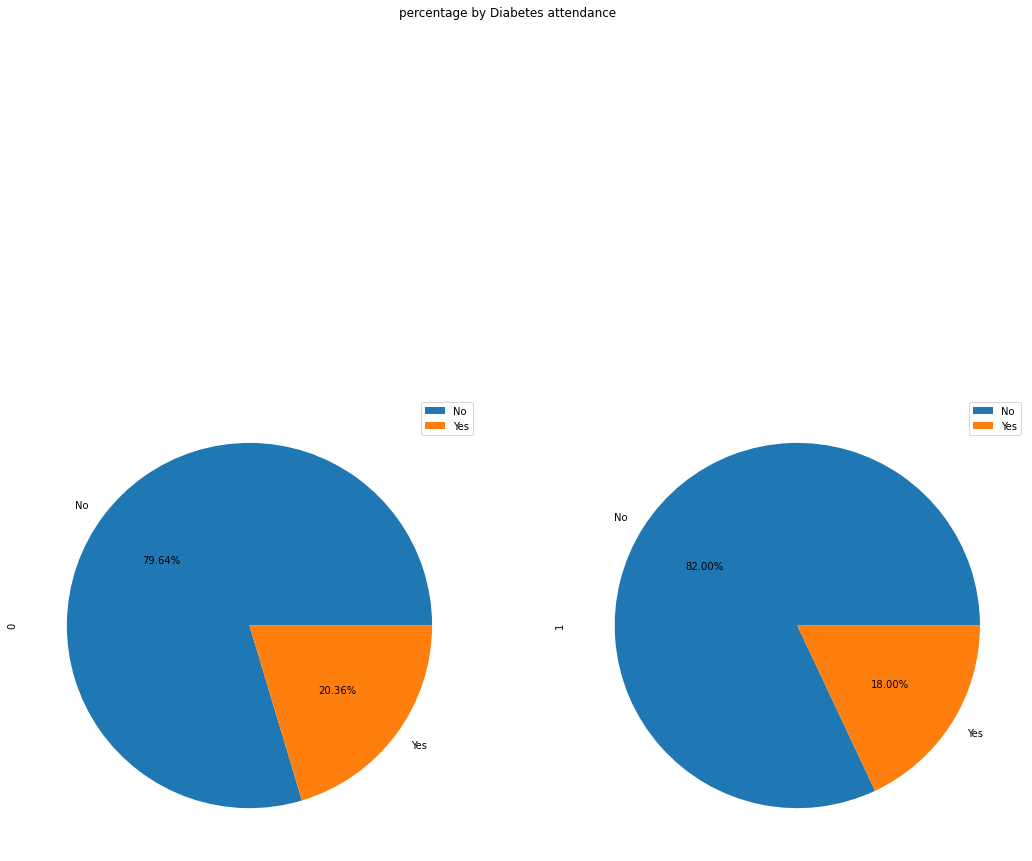

In [117]:
# Pie plot for 'Diabetes' factor
pie_plot('Diabetes')

this fig show that Diabetes make peaple more care a bout them health and show

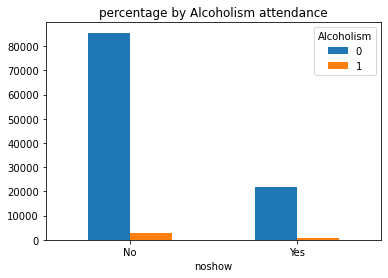

In [118]:
# Bar plot for 'Alcoholism' factor
bar_plot('Alcoholism')

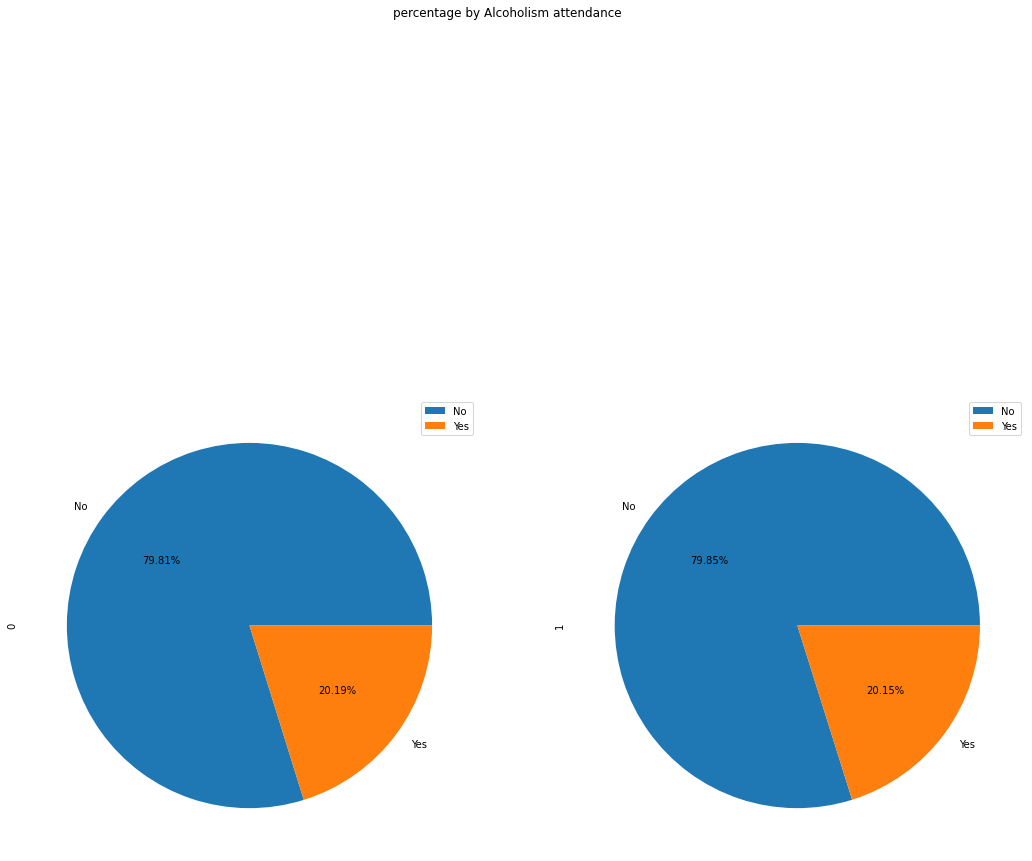

In [119]:
# Pie plot for 'Alcoholism' factor
pie_plot('Alcoholism')

this figer show that Alcoholism does not effect so mach

### Research Question 3 ( What is the influential of 'SMS_received' on showed up the appointment ?)

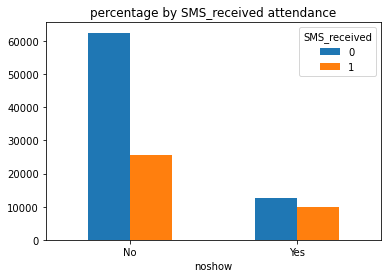

In [120]:
# Bar plot for 'SMS_received' factor
bar_plot('SMS_received')

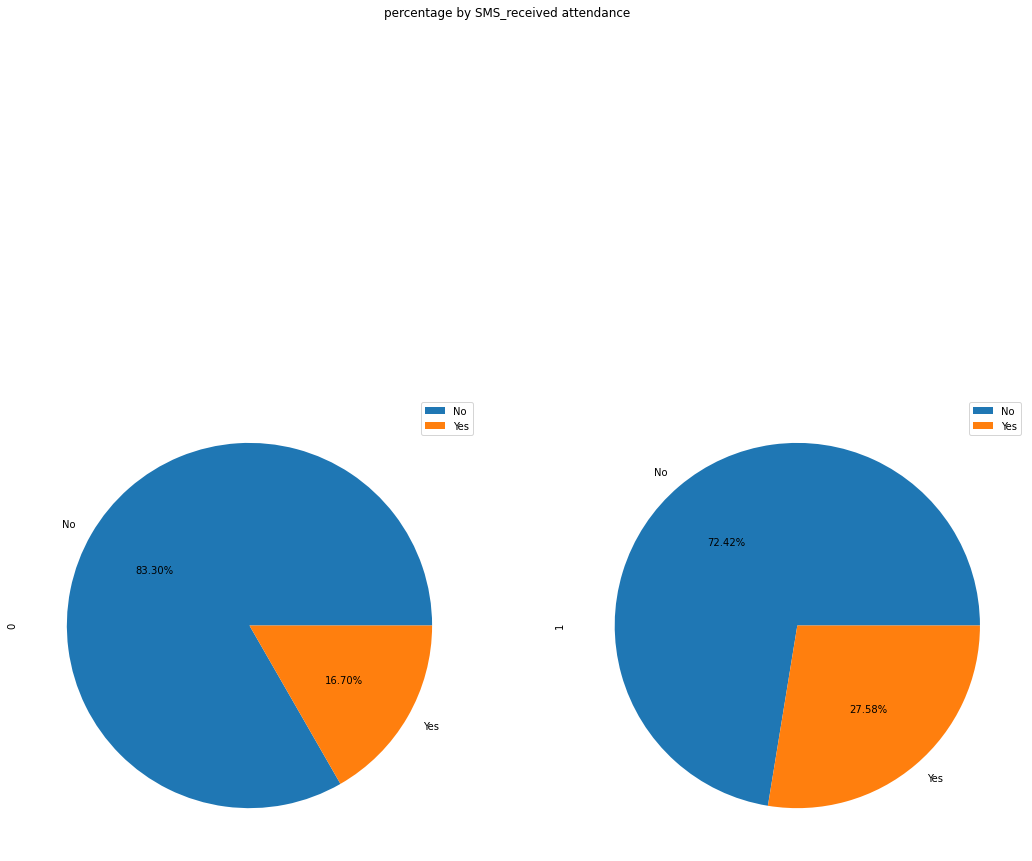

In [121]:
# Pie plot for 'SMS_received' factor
pie_plot('SMS_received')

### Research Question 4 ( Does Scholarship affects show up rate ?)

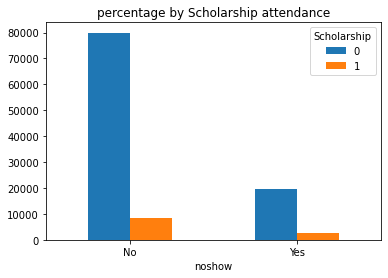

In [122]:
# Bar plot for 'Scolarship' factor
bar_plot('Scholarship')

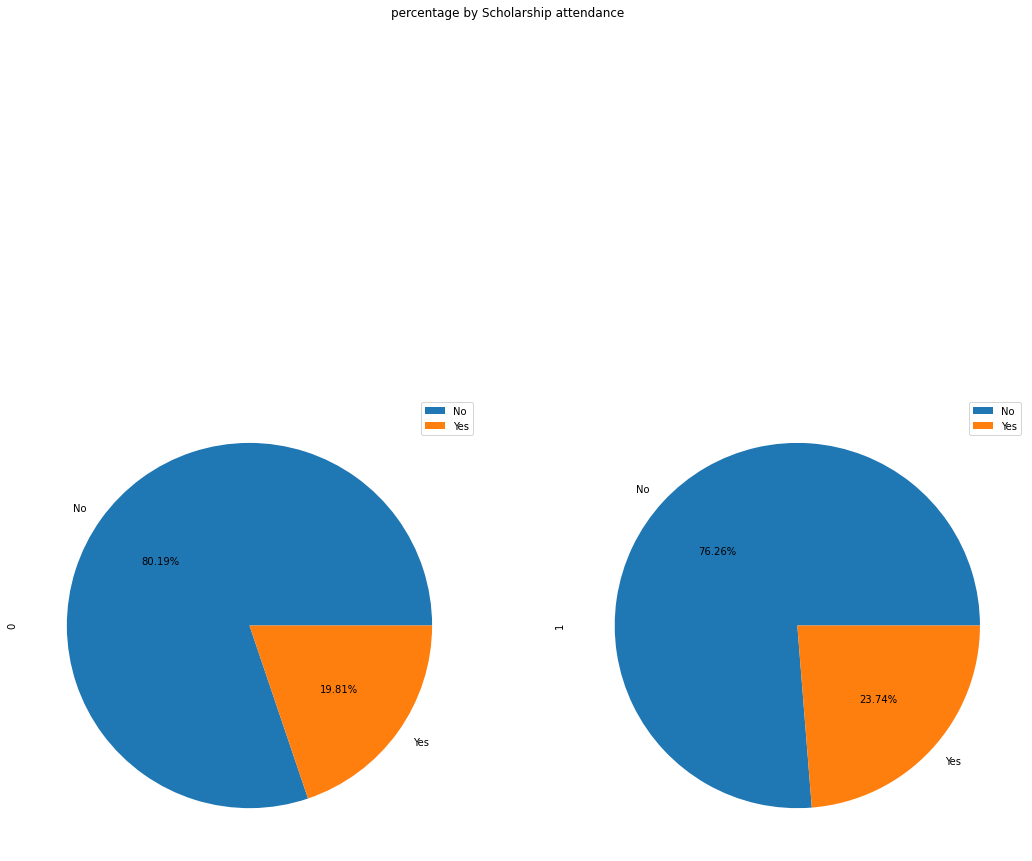

In [123]:
# Pie plot for 'Scholarship' factor
pie_plot('Scholarship')

<a id='conclusions'></a>
## Conclusions

 After analyzed the no-show data for the medical appointment I've got findings and i can recap it as follows :

1.the data set contained 110.527 appointments and 20.19% not 

2.the SMS received' has an adverse effect on attendance so we have to revisit it.

3.more female show than male while most of females didn't have a scholarship

4.most of patient were females and didn't have a scholarship

5.There is a much higher percentage of no-show when the interval between the appointment day and the scheduled day is greater than 30 days, compared to intervals below 30 days.

6.when the number of handcap increase the persentage of noshow increase

7.Hipertension make peaple more care a bout them health and show

8.that Diabetes make peaple more care a bout them health and show

9.Alcoholism does not effect so mach

## Limitations:

1.The data do not have information about area or specialization of medical from the scheduling.

2.The data variables are not highly correlated, because most of them are categorical.

3.The data are for a short period of the year 2016. If we had data for the whole year, or even for other years, we could have seasonality analyzes.

4.data set contant female than male

In [124]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295